## **Prediksi Risiko Diabetes Berdasarkan CDC Diabetes Health Indicators**

**Pendahuluan**

Diabetes merupakan salah satu penyakit kronis yang memiliki prevalensi tinggi di seluruh dunia dan menjadi penyebab utama komplikasi kesehatan jangka panjang seperti penyakit jantung, gagal ginjal, hingga kebutaan. Deteksi dini terhadap risiko diabetes sangat penting untuk meminimalkan dampak buruk dari penyakit ini dan meningkatkan kualitas hidup penderita. Salah satu pendekatan yang dapat digunakan dalam pencegahan dan pengendalian diabetes adalah melalui analisis indikator kesehatan populasi.

CDC Diabetes Health Indicators merupakan sekumpulan data yang dikumpulkan untuk mendeteksi faktor-faktor risiko yang berkontribusi terhadap kemungkinan seseorang menderita diabetes. Data ini mencakup berbagai informasi seperti gaya hidup, kondisi fisik, dan riwayat kesehatan individu yang sangat relevan untuk pengembangan sistem prediksi dan klasifikasi risiko diabetes.

## **Data Understanding**

**Sumber Data**

Dataset diambil dari link berikut:

https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

Dataset ini berasal dari Centers for Disease Control and Prevention (CDC), yang merupakan lembaga nasional di Amerika Serikat yang menangani masalah kesehatan masyarakat. Data dikumpulkan melalui survei nasional dan mencakup informasi kesehatan masyarakat dari berbagai negara bagian di Amerika Serikat. Dataset ini merupakan bagian dari Behavioral Risk Factor Surveillance System (BRFSS).

**Tujuan**

Tujuan dari penggunaan dataset ini adalah untuk membangun model prediksi yang mampu mengidentifikasi kemungkinan seseorang mengidap diabetes berdasarkan indikator kesehatan yang tersedia. Model ini dapat membantu dalam pengambilan keputusan medis dan penyusunan strategi intervensi dini.

**Integrasi Data**

Untuk memproses dan menganalisis data ini, langkah awal yang perlu dilakukan adalah mengunduh dan mengimpor dataset ke dalam lingkungan pemrograman seperti Python. Dataset ini dapat diakses secara langsung melalui UCI Machine Learning Repository.

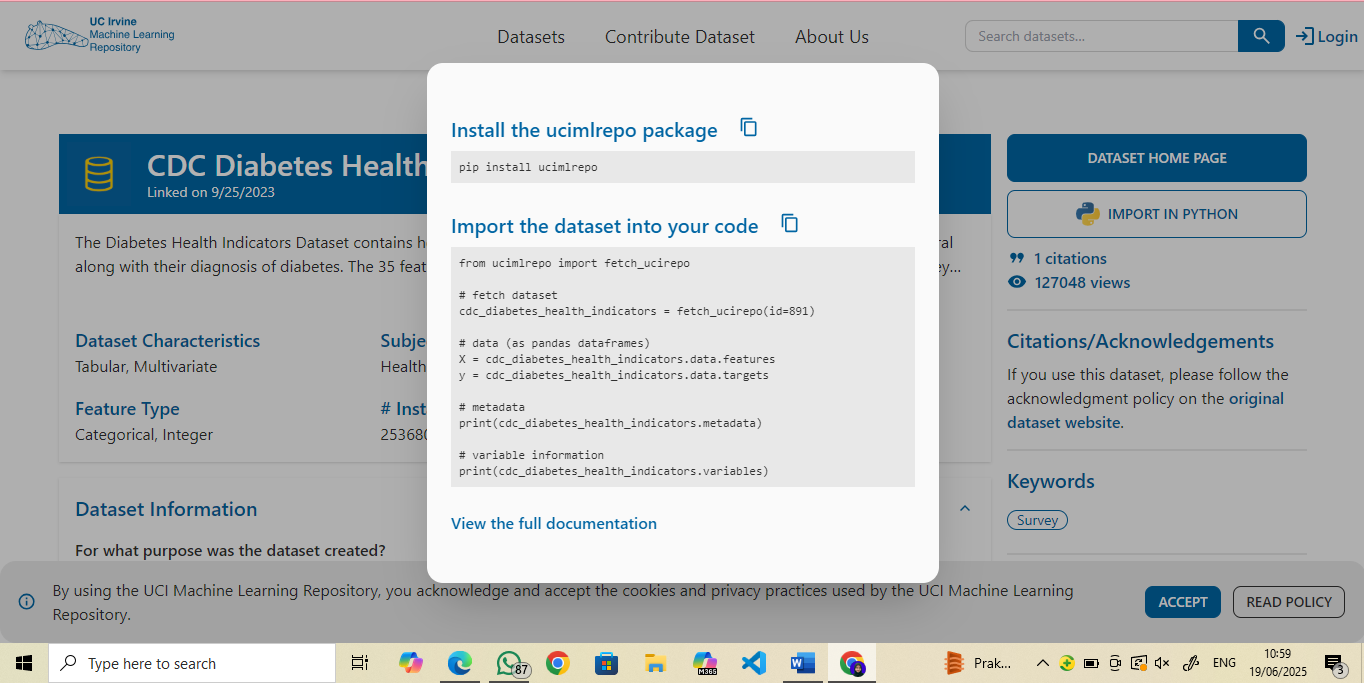

In [4]:
!pip install ucimlrepo

In [9]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset dari UCI
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Ambil fitur dan target (dalam format pandas dataframe)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# Gabungkan fitur dan target menjadi satu dataframe
data = pd.concat([X, y], axis=1)

# Simpan hasil komputasi ke dalam file CSV
data.to_csv("cdc_diabetes_health_indicators.csv", index=True)

# Tampilkan informasi kolom-kolom dataset
print(data.info())

# Tampilkan 5 baris pertama dari dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

## **Eksplorasi Data**

**Visualisasi Data**

In [10]:
display(data) #display dataset

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


/tmp/ipython-input-11-1264011645.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_binary', data=data, palette='viridis')


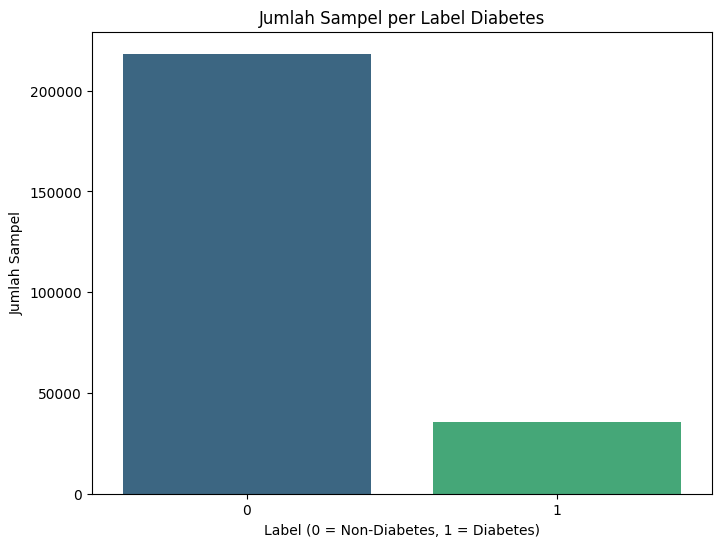

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi kelas target 'Diabetes_binary'
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=data, palette='viridis')
plt.title('Jumlah Sampel per Label Diabetes')
plt.xlabel('Label (0 = Non-Diabetes, 1 = Diabetes)')
plt.ylabel('Jumlah Sampel')
plt.show()


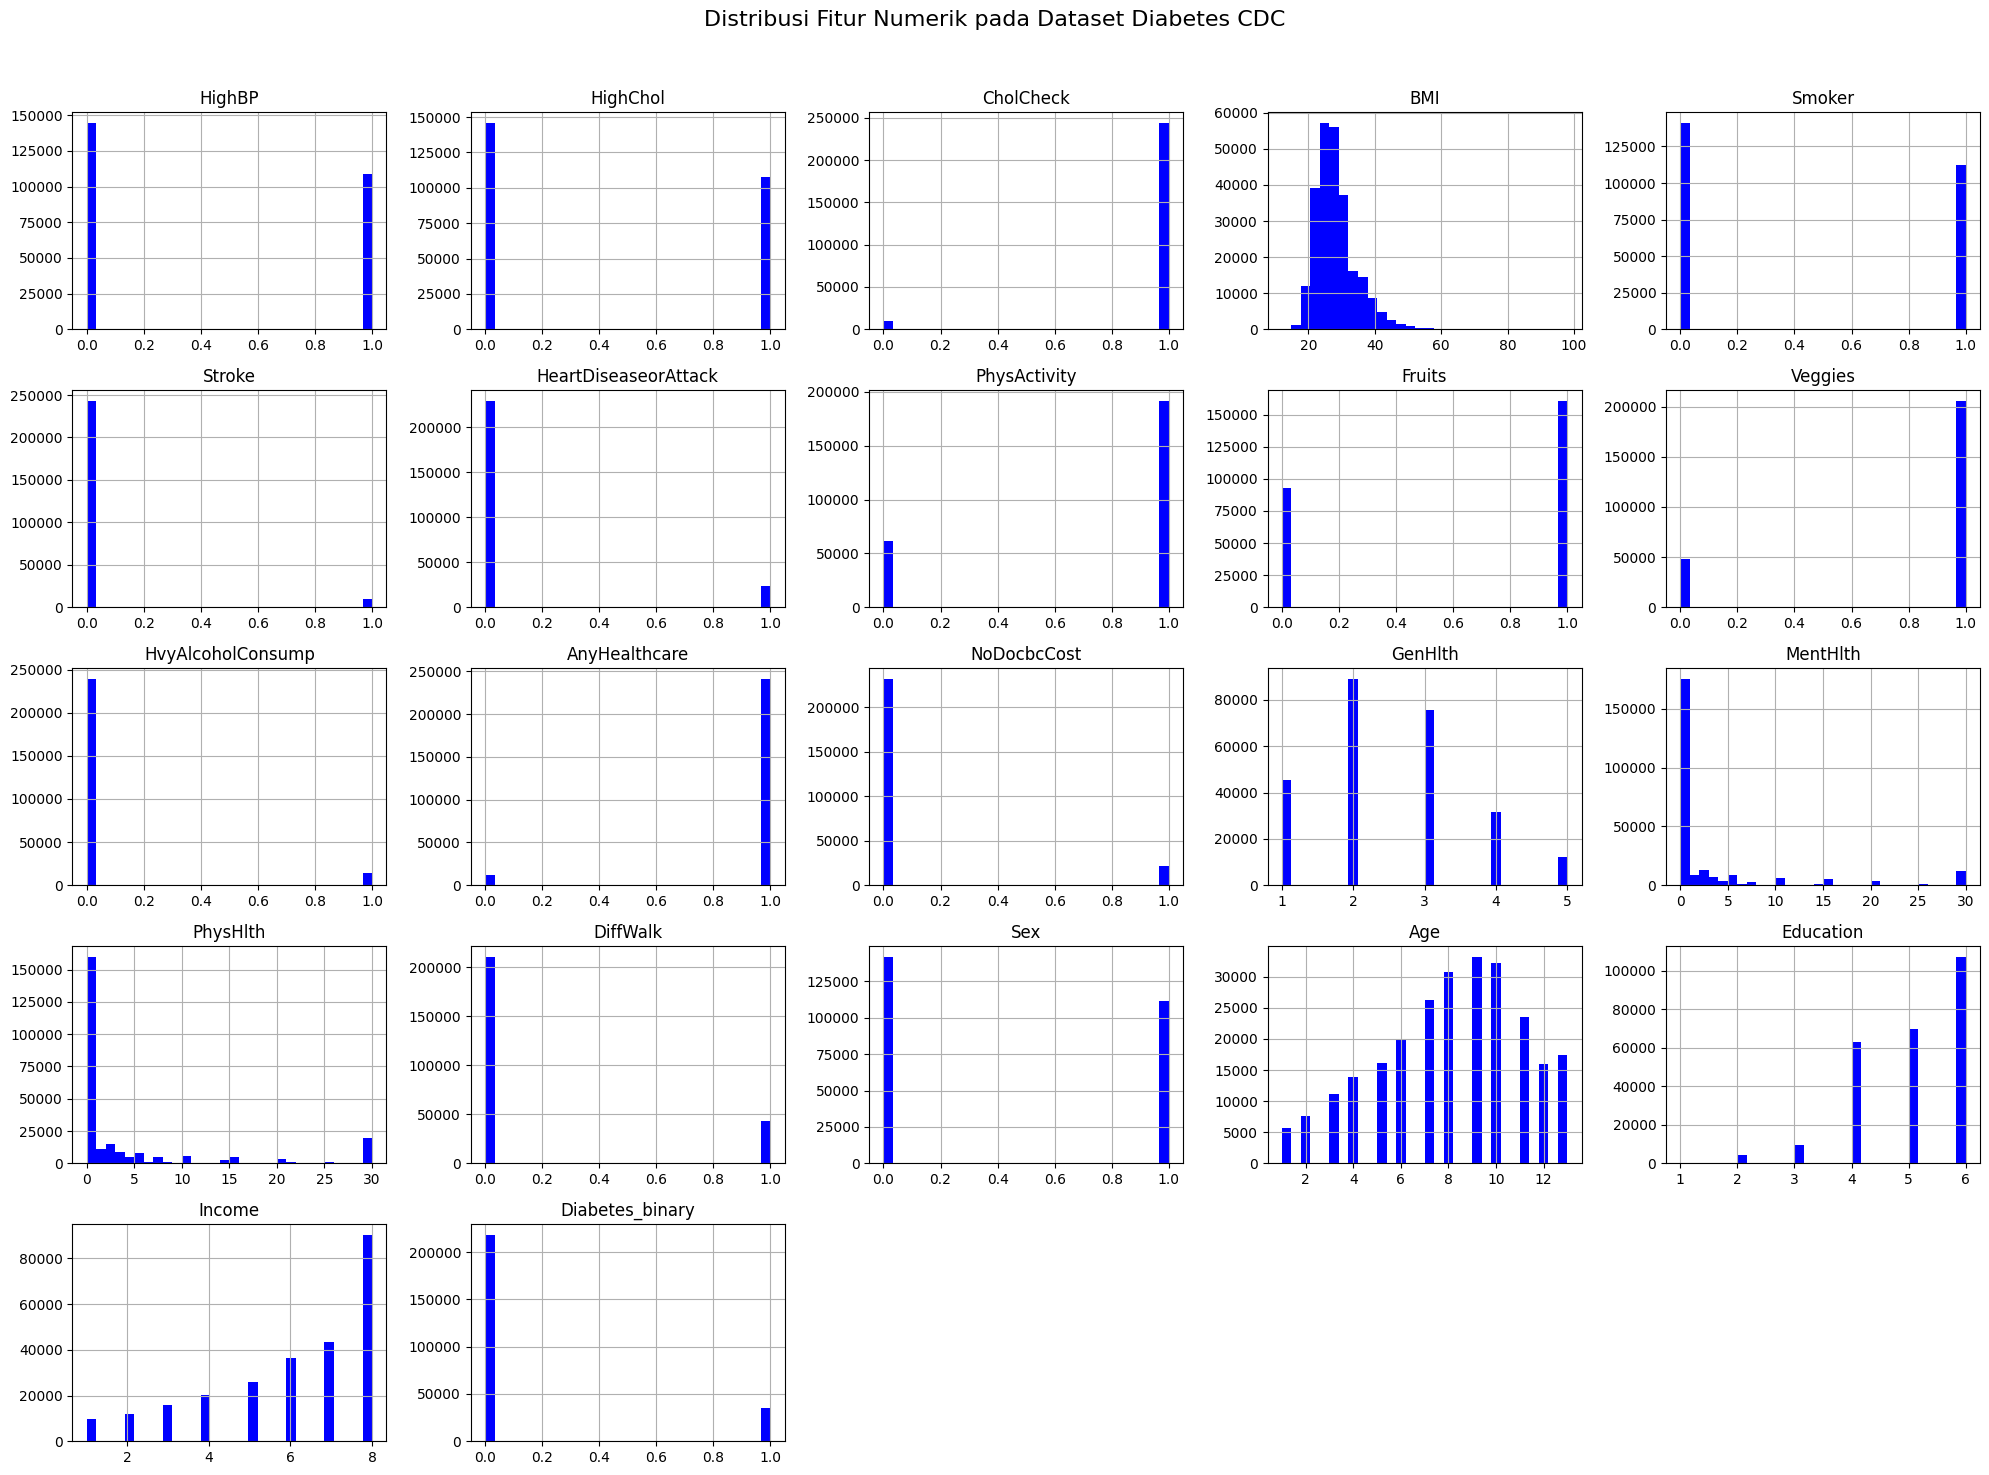

In [16]:
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
numerical_columns = data.select_dtypes(include='number')

# Plot histogram untuk semua kolom numerik
numerical_columns.hist(bins=30, figsize=(20, 15), color='blue')

# Judul global dan tata letak yang rapi
plt.suptitle('Distribusi Fitur Numerik pada Dataset Diabetes CDC', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Sisakan ruang untuk judul
plt.show()
